In [1]:
import pandas as pd
import numpy as np

from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/waterQuality/wQuality.csv')
train_data.head()

,Unnamed: 0,text,corr,class
0,0,predatory white pointers dingos saltwatercrocs...,1,0
1,1,this january simply note that are still having...,1,0
2,2,pronouns hehim height zodiac sign leo smoke he...,1,0
3,3,pronouns hehim height zodiac sign sagittarius ...,1,0
4,4,hoses are inchworm water lilies are powderblue...,1,0


In [31]:
# getting labels from pre-processed dataset
label = train_data["corr"].values
print(label)

[1 1 1 ... 0 0 0]


In [32]:
X_train, X_test, y_train, y_test = train_test_split (train_data['text'], label, test_size=0.3, random_state=0)

In [33]:
# label encoder
Encoder = LabelEncoder()
print(y_train[:10])

y_train = Encoder.fit_transform(y_train)
print(y_train[:10])

y_test = Encoder.fit_transform(y_test)

[1 0 0 1 1 1 1 1 0 0]
[1 0 0 1 1 1 1 1 0 0]


In [34]:
# TFIDF vectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train.values.astype(str))
X_test_tfidf = vectorizer.transform(X_test.values.astype(str))
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
# For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.
# more info: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc = LinearSVC()

# train
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [36]:
# predict the labels on validation dataset
predictions_SVM = svc.predict(X_test_tfidf)

In [37]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9501803813777702


In [38]:
train_sizes, train_scores, test_scores = learning_curve(LinearSVC(), X_train_tfidf, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)

[learning_curve] Training set sizes: [  244   738  1232  1726  2220  2714  3207  3701  4195  4689  5183  5677
  6171  6665  7159  7653  8147  8640  9134  9628 10122 10616 11110 11604
 12098 12592 13086 13580 14073 14567 15061 15555 16049 16543 17037 17531
 18025 18519 19013 19506 20000 20494 20988 21482 21976 22470 22964 23458
 23952 24446]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.0s finished


In [39]:
# getting mean values of training score
train_mean = np.mean(train_scores, axis=1)
train_mean

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99996315, 0.99975055, 0.99978384, 0.9998093 , 0.99963745,
       0.999672  , 0.99963009, 0.9996597 , 0.99966992, 0.99958095,
       0.99959493, 0.99943537, 0.99938657, 0.99926648, 0.99930411,
       0.99923928, 0.99916164, 0.99916292, 0.99900896, 0.99895851,
       0.9990629 , 0.99899893, 0.99868189, 0.99858594, 0.99859957,
       0.99845296, 0.99855352, 0.99848589, 0.99828326, 0.99823326,
       0.99816325, 0.99810818, 0.99806685, 0.99799085, 0.99793397,
       0.997845  , 0.99783351, 0.99782733, 0.99776092, 0.99771114,
       0.99762795, 0.99758753, 0.99758718, 0.99742819, 0.99740244])

In [40]:
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

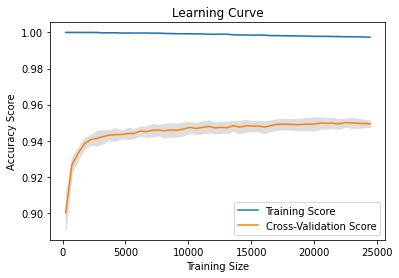

In [41]:
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')

In [42]:
accuracy = accuracy_score(y_test, predictions_SVM)
print(accuracy)

0.9501803813777702


In [43]:
print(f1_score(y_test, predictions_SVM, average="macro"))

0.9501793095078781


In [44]:
print(precision_score(y_test, predictions_SVM, average="macro"))

0.9506329414083332


In [45]:
print(recall_score(y_test, predictions_SVM, average="macro")) 

0.9504677267412078
